<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-03-02-tree-based-models-gradient-boosted-lightgbm-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1xLlN9eEG2IYFBlAuwl53aDVxcBkRnkEw
)

# 3.2 Light Gradient Boosting Machine (LightGBM)

LightGBM (Light Gradient Boosting Machine) is an open-source gradient boosting framework that is designed to be both efficient and scalable. It is based on the gradient boosting framework and uses a tree-based learning algorithm. This tutorial will guide you through the concepts and implementation of LightGBM, including its advantages, how it works, and how to implement it in Python.


## Overview

Light Gradient Boosting Machine (LightGBM) is a high-performance, distributed, and efficient gradient boosting framework designed for speed and scalability, particularly for large-scale datasets. Developed by Microsoft, it is optimized for tasks like classification, regression, ranking, and other machine learning problems. LightGBM is part of the gradient boosting family, which builds an ensemble of weak learners (typically decision trees) to create a strong predictive model. LightGBM stands out due to its focus on computational efficiency and memory optimization, making it faster and less resource-intensive than other gradient boosting frameworks like XGBoost, especially for large datasets with high-dimensional features.


### Key Features of LightGBM

- Histogram-based learning for speed and low memory use.
- Leaf-wise tree growth for high accuracy.
- Native categorical feature support.
- Parallel and GPU training.
- Sparse data optimization.
- Custom loss functions.
- Feature importance and early stopping.

### How LightGBM Works

LightGBM (Light Gradient Boosting Machine) operates as a gradient boosting framework that builds an ensemble of decision trees iteratively to minimize a loss function. Below is an explanation of each step in the provided flowchart, including relevant equations where applicable.


1. Data Preprocessing

In the "Data Preprocessing" step, the algorithm loads the dataset, handles categorical features, and discretizes continuous features into histograms to optimize computation. This involves transforming feature values $x_j$ for feature $j$ into discrete bins $h_j(x_j)$), where the number of bins $k$ is predefined, reducing memory usage and speeding up subsequent calculations.

2. Initialize Model

Sets the initial predictions for all instances, typically starting with a constant value that minimizes the loss function. This is expressed as:

$$ \hat{y}_i^{(0)} = \arg\min_{\gamma} \sum_{i=1}^n L(y_i, \gamma) $$

where $L$ represents the loss function (e.g., mean squared error for regression or log loss for classification), and $y_i$ is the true target value for instance $i$.

2. Compute Gradients and Hessians

Calculates the first-order (gradient) and second-order (Hessian) derivatives of the loss function with respect to the predictions. These guide the tree-building process.

Gradient:

$$ g_i^{(t)} = \frac{\partial L(y_i, \hat{y}_i^{(t-1)})}{\partial \hat{y}_i^{(t-1)}} $$
Hessain:

$$  h_i^{(t)} = \frac{\partial^2 L(y_i, \hat{y}_i^{(t-1)})}{\partial (\hat{y}_i^{(t-1)})^2} $$

These are computed for each instance $i$ at iteration $t$.

3. Apply GOSS (Gradient-based One-Side Sampling)

This step reduces the dataset size by sampling instances based on their gradient magnitudes, prioritizing those with larger gradients to focus on hard examples. The sampling probability is proportional to $p_i \propto |g_i|$, allowing the algorithm to use a subset of instances for constructing the next tree, thus improving efficiency.

::: callout-note
Gradient-based One-Side Sampling" (GOSS):

Gradient-based One-Side Sampling (GOSS) is a data subsampling method used in LightGBM. GOSS is designed to speed up the training process of gradient boosting algorithms while maintaining or improving the model's accuracy.GOSS works by first sorting the training instances according to their gradients. The instances with larger gradients are considered more important for the model, as they provide more information about the loss function
:::


4. Apply EFB (Exclusive Feature Bundling)

During the "Apply EFB (Exclusive Feature Bundling)" step, the algorithm groups mutually exclusive features into bundles to reduce dimensionality while minimizing information loss, which is particularly useful for sparse datasets. This involves combining features with no overlapping non-zero values into a single histogram, optimizing the feature space without significant loss of predictive power.

5. Build Decision Tree (Histogram-based, Leaf-wise growth)

The "Build Decision Tree (Histogram-based, Leaf-wise growth)" step constructs a decision tree using histogram-based splitting and selects the leaf with the maximum loss reduction for splitting, known as leaf-wise growth.

The optimal output for a leaf $q$ is  defined as:

$$\gamma_q = -\frac{G_q}{H_q + \lambda}$$
where $G_q = \sum_{i \in q} g_i$ is the sum of gradients, $H_q = \sum_{i \in q} h_i$ is the sum of Hessians, and $\lambda$ is a regularization parameter. The gain (loss reduction) from a split is calculated as:

$$ \text{Gain} = \frac{1}{2} \left[ \frac{G_L^2}{H_L + \lambda} + \frac{G_R^2}{H_R + \lambda} - \frac{G_q^2}{H_q + \lambda} \right] - \gamma $$

where $L$ and $R$ denote the left and right child nodes.

6. Update Model Predictions

The algorithm incorporates the new tree's contribution into the existing predictions, refining the model iteratively. This is done using the following equation:

$$ \hat{y}_i^{(t)} = \hat{y}_i^{(t-1)} + \eta \cdot \text{tree}_t(x_i) $$
where $\eta$ is the learning rate and $\text{tree}_t(x_i)$ is the prediction from the new tree for instance $i$ at iteration $t$.

::: callout-note
Leaf-wise Growth:

"Leaf-wise" growth strategy is a tree building algorithm used in gradient boosting algorithms such as LightGBM. In this strategy, the tree is grown leaf-wise, meaning that it starts by growing the tree with a single root node, and then at each step, it selects the leaf node that yields the largest reduction in the loss function, and splits it into two child nodes
:::

7. Check Stopping Criteria

This step evaluates whether to continue training by checking if the maximum number of trees is reached or if convergence is achieved. This is determined by conditions such as $t \geq \text{max_trees}$ or $\Delta L < \epsilon$, where $\Delta L$ is the change in loss and $\epsilon$ is a small threshold, halting the process when no significant improvement is observed.

8. Output Final Model

Finally, the "Output Final Model" step combines all the trained trees to produce the final predictive model, which is the sum of contributions from each tree. The final prediction for an instance $i$ is given by:

$$ \hat{y}_i = \sum_{t=1}^T \eta \cdot \text{tree}_t(x_i)  $$

where $T$ is the total number of trees, providing the complete model for inference.

Here below is a flowchart illustrating the lightGBM workflow:


![alt text](http://drive.google.com/uc?export=view&id=197dEVzOVTfItn4SMIM-1i-bQc-QVRPNb)








### Advantages of LightGBM

It is designed to be distributed and efficient with the following advantages:

-   Faster training speed and higher efficiency.

-   Lower memory usage.

-   Better accuracy.

-   Support of parallel, distributed, and GPU learning.

-   Capable of handling large-scale data.

### Limitations of LightGBM

- Leaf-wise tree growth can lead to overfitting, especially with small datasets or insufficient regularization, as it aggressively splits nodes with the highest loss reduction.
- Histogram-based learning may reduce precision for datasets with highly skewed or sparse features, potentially losing fine-grained information.
- Requires careful tuning of hyperparameters (e.g., learning rate, max depth, and number of leaves) to achieve optimal performance, which can be time-consuming.
- May struggle with extremely noisy data or datasets with a very high number of categorical features, where feature bundling might oversimplify relationships.
- Parallel and GPU support, while advantageous, can be resource-intensive and may not always scale well on very small datasets or underconstrained hardware.

### Key Hyperparameters of LightGBM

The key hyperparameters of LightGBM that significantly influence its performance include:

- `learning_rate`: Controls the step size for each iteration, typically set between 0.01 and 0.1, where a smaller value (e.g.,  $\eta$) slows learning but may improve generalization.
- `num_leaves`: Determines the maximum number of leaves in one tree, with higher values (e.g., 31 or 127) increasing model complexity and risk of overfitting.
- `max_depth`: Limits the maximum depth of each tree, preventing overfitting by capping growth (e.g., 5-10 is common).
- `min_data_in_leaf`: Sets the minimum number of data points in a leaf, helping to avoid overfitting (e.g., 20-100 depending on dataset size).
- `feature_fraction`: Specifies the fraction of features to consider per tree (e.g., 0.8), introducing randomness to reduce overfitting.
- `bagging_fraction`: Defines the fraction of data to sample for each iteration (e.g., 0.9), aiding in reducing variance.
- `lambda_l1` and `lambda_l2`: Regularization parameters (L1 and L2) to penalize large weights, controlling model complexity (e.g., 0 to 1).
- `min_gain_to_split`: Sets the minimum gain required to split a leaf, preventing unnecessary splits (e.g., 0.01).
- `num_iterations`: Defines the total number of boosting iterations or trees to build (e.g., 100-1000), affecting training time and accuracy.

### Comparison of GBM and LightGBM


| **Aspect**              | **GBM (Gradient Boosting Machine)**         | **LightGBM**                              |
|--------------------------|---------------------------------------------|-------------------------------------------|
| `Speed and Efficiency` | Slower, less memory-efficient due to level-wise growth | Faster and memory-efficient with histogram-based learning |
| `Tree Growth Strategy` | Level-wise, grows trees layer by layer      | Leaf-wise, splits leaf with max loss reduction |
| `Scalability`          | Struggles with large datasets, sequential   | Optimized for large datasets, supports parallel/GPU training |
| `Feature Handling`     | Requires preprocessed categorical features  | Natively supports categorical features    |
| `Sampling Techniques`  | Lacks advanced sampling methods             | Uses GOSS and EFB for data/feature reduction |
| `Overfitting Control`  | More robust due to level-wise approach      | Requires tuning (e.g., min_data_in_leaf) to prevent overfitting |


## Light GBM Implementation from Scratch in Python

Implementing LightGBM from scratch in Python for classification and regression without using any external packages involves creating a simplified version of its core concepts, such as gradient boosting with histogram-based learning and leaf-wise tree growth. Below is a basic implementation focusing on the key steps: initializing a model, computing gradients and Hessians, building decision trees iteratively, and updating predictions. This example uses a simple dataset and avoids advanced features like GOSS or EFB for simplicity.

### Generate Synthetic Data






In [1]:
# Generate synthetic data
import numpy as np
np.random.seed(123)
n = 100

# Regression data
X_reg = np.random.rand(n, 2)  # 2 features
y_reg = 2 * X_reg[:, 0] + 3 * X_reg[:, 1] + np.random.randn(n)  # Linear target with noise

# Classification data (binary)
X_class = np.random.rand(n, 2)
y_class = (2 * X_class[:, 0] + 3 * X_class[:, 1] + np.random.randn(n) > 0).astype(int)  # Binary target

### LightGBM Implementation

- Parameters: `n_trees` = 10, `learning_rate` = 0.1, `max_depth` = 3, `min_data_in_leaf` = 5.

- `build_tree` recursively builds a tree, returns $\text{mean(grad)} / (\text{mean(hess)} + 1e-10$ if `depth` = 0 or `grad` ≤ `min_data`.

- Splits on first feature's median threshold, checks `min_data` in splits, recursively builds left/right subtrees, returns list with values, threshold, and feature.

- `update_prediction` returns `tree * learning_rate` for numeric leaves, else compares $ x[\text{tree$feature}] $ with `tree$threshold`, recursively calls `tree$left` or `tree$right`.


In [2]:
# Parameters
n_trees = 10
learning_rate = 0.1
max_depth = 3
min_data_in_leaf = 5

# Function to build a simple decision tree
def build_tree(X, grad, hess, depth, min_data):
    if depth == 0 or len(grad) <= min_data:
        return np.mean(grad) / (np.mean(hess) + 1e-10)  # Leaf value

    feature_idx = 0 # Use the first feature
    threshold = np.median(X[:, feature_idx])
    left_idx = np.where(X[:, feature_idx] <= threshold)[0]
    right_idx = np.where(X[:, feature_idx] > threshold)[0]

    if len(left_idx) < min_data or len(right_idx) < min_data:
        return np.mean(grad) / (np.mean(hess) + 1e-10)

    left_value = build_tree(X[left_idx, :], grad[left_idx], hess[left_idx], depth - 1, min_data)
    right_value = build_tree(X[right_idx, :], grad[right_idx], hess[right_idx], depth - 1, min_data)

    return {'left': left_value, 'right': right_value, 'threshold': threshold, 'feature': feature_idx}

# Function to update predictions
def update_prediction(x, tree):
    if isinstance(tree, (int, float)):
        return tree * learning_rate
    if x[tree['feature']] <= tree['threshold']:
        return update_prediction(x, tree['left'])
    else:
        return update_prediction(x, tree['right'])

#### Regression and Classification Implementation

In [3]:
# Regression Implementation
predictions_reg = np.full(n, np.mean(y_reg))
for t in range(n_trees):
  gradients = y_reg - predictions_reg  # Gradient for squared error
  hessians = np.ones(n)  # Hessian for squared error
  tree = build_tree(X_reg, gradients, hessians, max_depth, min_data_in_leaf)
  for i in range(n):
    predictions_reg[i] = predictions_reg[i] + update_prediction(X_reg[i, :], tree)


# Classification Implementation
predictions_class = np.zeros(n)  # Initial log-odds (can start at 0)
for t in range(n_trees):
  # Logistic loss gradient and Hessian
  p = 1 / (1 + np.exp(-predictions_class))  # Sigmoid
  gradients = p - y_class  # Gradient for log loss
  hessians = p * (1 - p)  # Hessian for log loss
  tree = build_tree(X_class, gradients, hessians, max_depth, min_data_in_leaf)
  for i in range(n):
    predictions_class[i] = predictions_class[i] + update_prediction(X_class[i, :], tree)


# Output results
print("Regression Predictions:")
print(predictions_reg[:6])
print("\nClassification Predictions (Log-Odds):")
print(predictions_class[:6])
print("\nClassification Probabilities:")
print(1 / (1 + np.exp(-predictions_class[:6])))  # Convert to probabilities

Regression Predictions:
[3.25790473 1.90707431 2.50924032 3.21484025 2.13464193 2.25205466]

Classification Predictions (Log-Odds):
[-701.96409818 -701.96409818   -8.47748064 -701.96409818   -3.36424629
 -701.96409818]

Classification Probabilities:
[1.38313849e-305 1.38313849e-305 2.08059031e-004 1.38313849e-305
 3.34317364e-002 1.38313849e-305]


####  Prediction Evaluation



In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, log_loss

# Regression Metrics
mse = mean_squared_error(y_reg, predictions_reg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_reg, predictions_reg)

# Classification Metrics
pred_prob = 1 / (1 + np.exp(-predictions_class))  # Convert log-odds to probabilities
predicted_class = (pred_prob >= 0.5).astype(int)  # Threshold at 0.5
accuracy = accuracy_score(y_class, predicted_class)

# Log Loss
logloss = log_loss(y_class, pred_prob)


# Print Results
print("Regression Evaluation:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print("\nClassification Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Log Loss: {logloss:.4f}")

Regression Evaluation:
MSE: 1.4251
RMSE: 1.1938
MAE: 0.9726

Classification Evaluation:
Accuracy: 0.0500
Log Loss: 24.3926


## Light Gradient Boosting Machine (lightGBM) in Python

LightGBM (Light Gradient Boosting Machine) is a high-performance, open-source gradient boosting framework designed for speed, efficiency, and scalability in machine learning tasks. Built by Microsoft, it is particularly suited for large datasets and supports tasks like classification, regression, and ranking. Its optimized algorithms and support for parallel and GPU computing make it a popular choice for data scientists.

**Key Features of LightGBM**

1. **High Performance**: Uses histogram-based algorithms and leaf-wise tree growth for faster training and lower memory usage.
2. **Scalability**: Handles large datasets and high-dimensional data efficiently with support for distributed and GPU training.
3. **Native Categorical Feature Support**: Directly processes categorical features without one-hot encoding, improving speed and memory usage.
4. **Flexible Objectives**: Supports various tasks, including binary/multiclass classification, regression, ranking, and custom loss functions.
5. **Scikit-learn Compatibility**: Offers a scikit-learn API (`LGBMClassifier`, `LGBMRegressor`) for seamless integration with existing workflows.
6. **Early Stopping**: Stops training when validation performance plateaus, saving time and preventing overfitting.
7. **Feature Importance**: Provides tools to analyze feature contributions, aiding model interpretation.
8. **Cross-Platform**: Available on Windows, Linux, and macOS, with easy installation via pip (`pip install lightgbm`).



In [ ]:
!pip install lightgbm

In [5]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
import warnings
warnings.filterwarnings('ignore')

### Regression with LightGBM

#### Data and Data Preparation



In [6]:
# Load California Housing data
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal')

# Combine features and target for easier splitting and scaling
df = X.copy()
df['MedHouseVal'] = y

# Set random seed for reproducibility
np.random.seed(123)

# Display data summary
print(df.head())
print(df.dtypes)

# Split data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Feature scaling (only apply to features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames with original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object



#### Load the train and test data into the LightGBM dataset object

In [7]:
import lightgbm as lgb

# Load train and test data into LightGBM dataset object
train_lgb = lgb.Dataset(data = X_train_scaled, label = y_train)
test_lgb = lgb.Dataset(data = X_test_scaled, label = y_test, reference=train_lgb)

#### Fit lightGBM model

Next, we'll fit the light model by using the `lgb.train()` function, which displays the training and testing RMSE (root mean squared error) for each round of boosting


In [8]:
# Define parameters
params = {
    "objective": "regression",
    "metric": "l2",
    "min_data_in_leaf": 1,
    "learning_rate": 0.05,
    "num_threads": 2,
}

# fit lightgbm model
lightgbm_model = lgb.train(
  params,
  train_lgb,
  num_boost_round = 100,
  valid_sets = [test_lgb],
  callbacks=[lgb.early_stopping(stopping_rounds=3, verbose=True), lgb.log_evaluation(period=1)]  # Use callback for early stopping and enable logging to monitor training
)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 14448, number of used features: 8
[LightGBM] [Info] Start training from score 2.065100
[1]	valid_0's l2: 1.2698
Training until validation scores don't improve for 3 rounds
[2]	valid_0's l2: 1.1945
[3]	valid_0's l2: 1.12652
[4]	valid_0's l2: 1.06446
[5]	valid_0's l2: 1.00464
[6]	valid_0's l2: 0.953131
[7]	valid_0's l2: 0.903817
[8]	valid_0's l2: 0.861045
[9]	valid_0's l2: 0.819553
[10]	valid_0's l2: 0.779968
[11]	valid_0's l2: 0.744464
[12]	valid_0's l2: 0.711487
[13]	valid_0's l2: 0.682288
[14]	valid_0's l2: 0.65472
[15]	valid_0's l2: 0.629638
[16]	valid_0's l2: 0.606408
[17]	valid_0's l2: 0.584602
[18]	valid_0's l2: 0.565172
[19]	valid_0's l2: 0.548545
[20]	valid_0's l2: 0.532135
[21]	valid_0's l2: 0.517402
[22]	valid_0's l2: 0.50183
[

In [11]:
print(lightgbm_model.params)

{'objective': 'regression', 'metric': 'l2', 'min_data_in_leaf': 1, 'learning_rate': 0.05, 'num_threads': 2, 'num_iterations': 100}


#### Predict and Evaluate Initial Model

In [12]:
# Prediction and Evaluation
yhat_fit_train = lightgbm_model.predict(X_train_scaled)
yhat_predict_test = lightgbm_model.predict(X_test_scaled)

# Define RMSE function
def RMSE(actual, predicted):
  return np.sqrt(mean_squared_error(actual, predicted))

rmse_train = RMSE(y_train, yhat_fit_train)
rmse_test = RMSE(y_test, yhat_predict_test)
print("Training RMSE:", rmse_train)
print("Test RMSE:", rmse_test)

Training RMSE: 0.4301483551120543
Test RMSE: 0.514383011220109


#### Hyperparameter Tuning for the Best Parameters

To find the best parameters for the LightGBM model using cross-validation (CV) and grid search, I'll implement a grid search over key hyperparameters (`num_leaves`, `learning_rate`, `max_depth`, m`in_data_in_leaf`) with 5-fold cross-validation to optimize the RMSE metric.


##### Define Parameter Grid and Initialize Variables

In [13]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
import pandas as pd
import numpy as np

# Define parameter grid for grid search
param_grid = {
    'num_leaves': [20, 31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 7, -1],  # -1 means no limit
    'min_data_in_leaf': [10, 20]
}

# Initialize GridSearchCV
gbm = lgb.LGBMRegressor(random_state=123)

grid_search = GridSearchCV(
    estimator=gbm,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # Optimize for negative RMSE
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1 # Use all available cores
)

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Initialize variables to store best parameters and RMSE
best_rmse = -grid_search.best_score_ # Convert negative RMSE back to positive
best_params = grid_search.best_params_

# Store results (optional, can access through grid_search.cv_results_)
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_num_leaves', 'param_learning_rate', 'param_max_depth', 'param_min_data_in_leaf', 'mean_test_score']]
results['mean_test_score'] = -results['mean_test_score'] # Convert negative RMSE to positive
results.rename(columns={'param_num_leaves': 'num_leaves',
                        'param_learning_rate': 'learning_rate',
                        'param_max_depth': 'max_depth',
                        'param_min_data_in_leaf': 'min_data_in_leaf',
                        'mean_test_score': 'cv_rmse'}, inplace=True)


print(f"Grid search finished. Best CV RMSE: {best_rmse:.4f}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 14448, number of used features: 8
[LightGBM] [Info] Start training from score 2.065100
Grid search finished. Best CV RMSE: 0.4543


##### The best parameters

In [14]:
# Output results
print("\nBest Parameters:")
print(grid_search.best_params_)


Best Parameters:
{'learning_rate': 0.1, 'max_depth': -1, 'min_data_in_leaf': 20, 'num_leaves': 50}


##### Train and Validate Model with Best Parameters

In [15]:
# Train final model with best parameters
final_model = lgb.LGBMRegressor(**grid_search.best_params_, random_state=123)

# Re-load and split California Housing data to ensure correct test set
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name='MedHouseVal')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Feature scaling (re-apply to features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

final_model.fit(X_train_scaled, y_train,
                eval_set=[(X_test_scaled, y_test)], # Ensure X_test_scaled and y_test are from regression data
                eval_metric='l2',
                callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False), lgb.log_evaluation(period=100)])

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 14448, number of used features: 8
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Start training from score 2.065100
[100]	valid_0's l2: 0.22887


LGBMRegressor(min_data_in_leaf=20, num_leaves=50, random_state=123)

##### Predictions and Evaluation

In [16]:
from sklearn.metrics import mean_squared_error

# Predictions and evaluation
train_pred = final_model.predict(X_train_scaled)
test_pred = final_model.predict(X_test_scaled)

mse_train_final = mean_squared_error(y_train, train_pred)
rmse_train_final = np.sqrt(mse_train_final)

mse_test_final = mean_squared_error(y_test, test_pred)
rmse_test_final = np.sqrt(mse_test_final)


print("\nFinal Model Performance:")
print(f"Training RMSE: {rmse_train_final:.6f}")
print(f"Test RMSE: {rmse_test_final:.6f}")

# Save grid search results
# results.to_csv("grid_search_results.csv", index=False)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20

Final Model Performance:
Training RMSE: 0.344781
Test RMSE: 0.478403


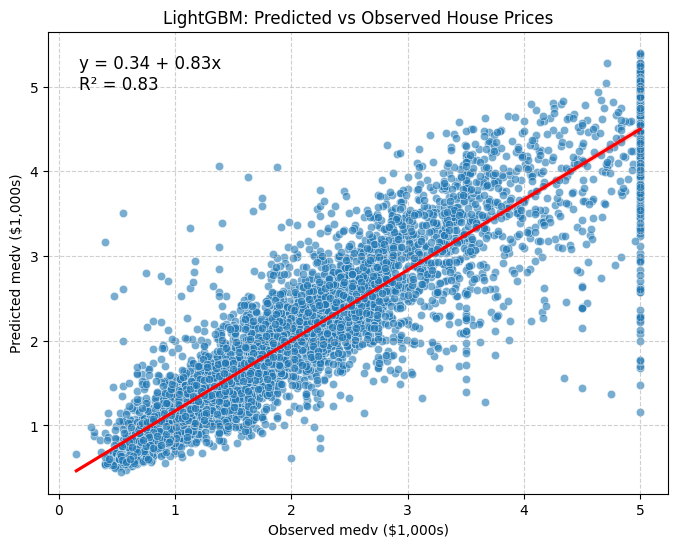

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1:1 Plot of Predicted vs Observed values
test_df = pd.DataFrame({'medv': y_test, 'medv_pred': test_pred})

plt.figure(figsize=(8, 6))
sns.scatterplot(data=test_df, x='medv', y='medv_pred', alpha=0.6)
sns.regplot(data=test_df, x='medv', y='medv_pred', scatter=False, color='red')

# Add R2 and equation
slope, intercept = np.polyfit(test_df['medv'], test_df['medv_pred'], 1)
r2 = r2_score(test_df['medv'], test_df['medv_pred'])
plt.text(0.05, 0.95, f'y = {intercept:.2f} + {slope:.2f}x\nR² = {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


plt.title("LightGBM: Predicted vs Observed House Prices")
plt.xlabel("Observed medv ($1,000s)")
plt.ylabel("Predicted medv ($1,000s)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

##### Feature Importance

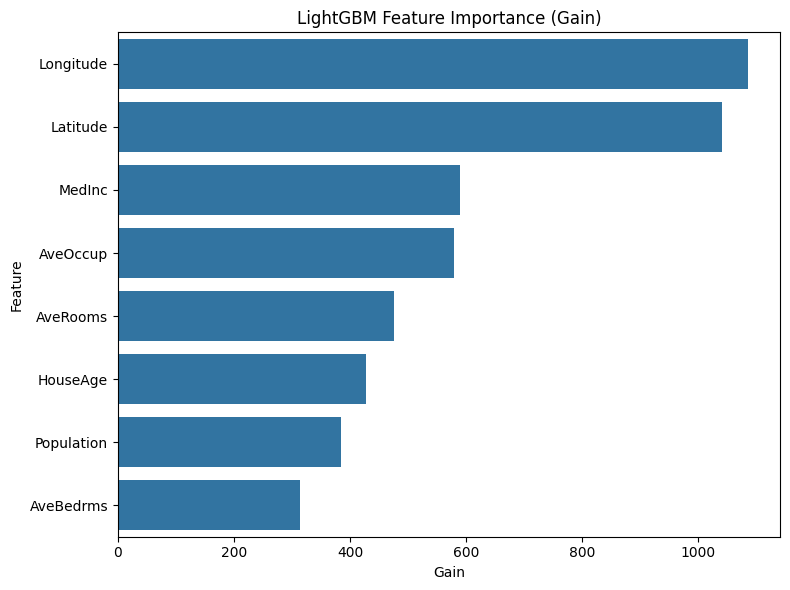

In [18]:
# Compute and plot variable importance
importance = final_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Gain': importance})
importance_df = importance_df.sort_values(by='Gain', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Gain', y='Feature', data=importance_df, color='#1f77b4')
plt.title("LightGBM Feature Importance (Gain)")
plt.xlabel("Gain")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### Classification with LightGBM

In this section, we will use the {lightGBM} package to perform classification on a dataset. We will load the dataset, preprocess it, and then fit an lightgbm model for classification. The dataset will be split into training and testing sets, and we will evaluate the model's performance using accuracy and confusion matrix.

#### Data and Data Preparation

We will use`health insurance` dataset to predict the product type (A, B, or C) based on various features such as age, household size, position level, and absence records.

In [19]:
# Load the dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss
import numpy as np
import lightgbm as lgb

df = pd.read_csv("https://github.com/zia207/r-colab/raw/main/Data/Machine_Learning/health_insurance.csv")

# Create subset with specified variables
df = df[['product', 'age', 'household', 'position_level', 'absent', 'gender']].copy()

# Encode target variable (product: A=0, B=1, C=2)
le = LabelEncoder()
df['product'] = le.fit_transform(df['product'])

# Create dummy variables for gender
df = pd.get_dummies(df, columns=['gender'], drop_first=True)

# Create training and test datasets
np.random.seed(123)
X = df.drop('product', axis=1)
y = df['product']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)


# Load train and test data into LightGBM dataset objects
train_lgb = lgb.Dataset(data = X_train, label = y_train)
test_lgb = lgb.Dataset(data = X_test, label = y_test, reference=train_lgb)

#### Fit lightGBM Classification Model

In [20]:
# Fit initial model with fixed parameters
initial_params = {
    "objective": "multiclass",
    "metric": "multi_logloss",
    "num_class": 3,
    "num_leaves": 31,
    "learning_rate": 0.05,
    "max_depth": 5,
    "min_data_in_leaf": 10,
    "num_threads": 2
}

initial_model = lgb.train(
  initial_params,
  train_lgb,
  num_boost_round = 100,
  callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False), lgb.log_evaluation(period=1)],
  valid_sets = [test_lgb]
)

print(initial_model.params)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 1086, number of used features: 5
[LightGBM] [Info] Start training from score -1.076753
[LightGBM] [Info] Start training from score -1.152526
[LightGBM] [Info] Start training from score -1.068678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's multi_logloss: 1.03563
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2

#### Predictions and Evaluation



In [23]:
# Predictions and evaluation for initial model
yhat_train = initial_model.predict(X_train)
yhat_test = initial_model.predict(X_test)
yhat_train_pred = np.argmax(yhat_train, axis=1)
yhat_test_pred = np.argmax(yhat_test, axis=1)

# Calculate accuracy and log loss
accuracy_train_initial = accuracy_score(y_train, yhat_train_pred)
accuracy_test_initial = accuracy_score(y_test, yhat_test_pred)
logloss_train_initial = log_loss(y_train, yhat_train)
logloss_test_initial = log_loss(y_test, yhat_test)

# Output results
print("\nInitial Model Performance:")
print(f"Training Accuracy: {accuracy_train_initial:.6f}")
print(f"Test Accuracy: {accuracy_test_initial:.6f}")
print(f"Training Log Loss: {logloss_train_initial:.6f}")
print(f"Test Log Loss: {logloss_test_initial:.6f}")


Initial Model Performance:
Training Accuracy: 0.879374
Test Accuracy: 0.801105
Training Log Loss: 0.270373
Test Log Loss: 0.380135


#### Feature Importance



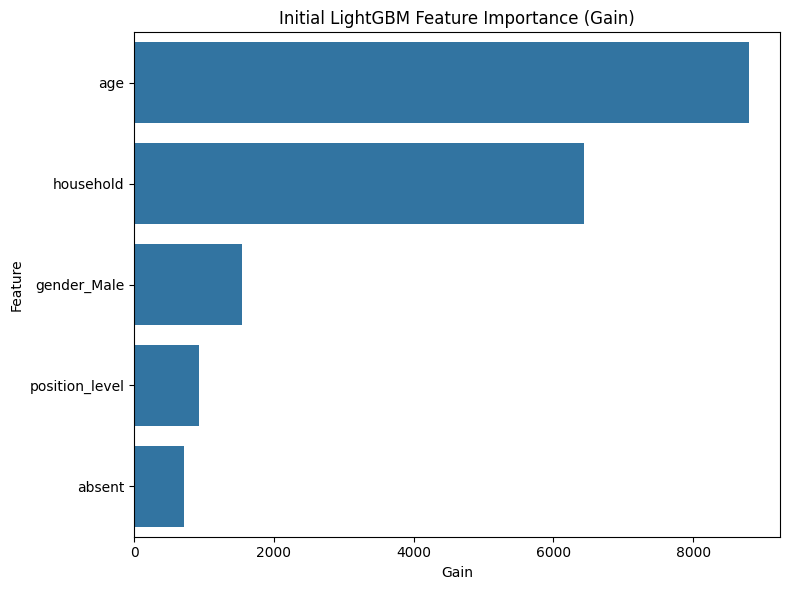

In [25]:
# Feature importance for initial model
importance_initial = initial_model.feature_importance(importance_type='gain')
feature_names = X_train.columns

importance_initial_df = pd.DataFrame({'Feature': feature_names, 'Gain': importance_initial})
importance_initial_df = importance_initial_df.sort_values(by='Gain', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Gain', y='Feature', data=importance_initial_df, color='#1f77b4')
plt.title("Initial LightGBM Feature Importance (Gain)")
plt.xlabel("Gain")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#### Hyperparameter Tuning for the Best Parameters

To find the best parameters for the LightGBM classification model, we will perform a grid search over key hyperparameters (`num_leaves`, `learning_rate`, `max_depth`, `min_data_in_leaf`) using 5-fold cross-validation. This will help us optimize the multi-class log loss metric.

##### Define Parameter Grid and Initialize Variables

In [ ]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
import pandas as pd
import numpy as np

# Define parameter grid for grid search
param_grid = {
    'num_leaves': [20, 31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_data_in_leaf': [10, 20]
}

# Initialize GridSearchCV
gbm = lgb.LGBMClassifier(objective='multiclass', num_class=3, random_state=123)

grid_search = GridSearchCV(
    estimator=gbm,
    param_grid=param_grid,
    scoring='neg_log_loss',  # Optimize for negative log loss
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1 # Use all available cores
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Initialize variables to store best parameters and log loss
best_logloss = -grid_search.best_score_ # Convert negative log loss back to positive
best_params = grid_search.best_params_

# Store results (optional, can access through grid_search.cv_results_)
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_num_leaves', 'param_learning_rate', 'param_max_depth', 'param_min_data_in_leaf', 'mean_test_score']]
results['mean_test_score'] = -results['mean_test_score'] # Convert negative log loss to positive
results.rename(columns={'param_num_leaves': 'num_leaves',
                        'param_learning_rate': 'learning_rate',
                        'param_max_depth': 'max_depth',
                        'param_min_data_in_leaf': 'min_data_in_leaf',
                        'mean_test_score': 'cv_logloss'}, inplace=True)

print(f"Grid search finished. Best CV Log Loss: {best_logloss:.6f}")

##### The Best Parameters

In [28]:
# The Best Parameters
print("\nBest Parameters from Grid Search:")
print(grid_search.best_params_)


Best Parameters from Grid Search:
{'learning_rate': 0.1, 'max_depth': 3, 'min_data_in_leaf': 10, 'num_leaves': 20}


##### Train and Validate Model with Best Parameters

In [30]:
# Train final model with best parameters
final_model = lgb.LGBMClassifier(**grid_search.best_params_, objective='multiclass', num_class=3, random_state=123)

final_model.fit(X_train, y_train,
                eval_set=[(X_test, y_test)],
                eval_metric='multi_logloss',
                callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False), lgb.log_evaluation(period=100)])

print(final_model.get_params())

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 1086, number of used features: 5
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Start training from score -1.076753
[LightGBM] [Info] Start training from score -1.152526
[LightGBM] [Info] Start training from score -1.068678
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

##### Predictions and Evaluation for Final Model

In [31]:
# Predictions and evaluation for final model
yhat_train_final = final_model.predict_proba(X_train)
yhat_test_final = final_model.predict_proba(X_test)
yhat_train_final_pred = np.argmax(yhat_train_final, axis=1)
yhat_test_final_pred = np.argmax(yhat_test_final, axis=1)

# Calculate accuracy
accuracy_train_final = accuracy_score(y_train, yhat_train_final_pred)
accuracy_test_final = accuracy_score(y_test, yhat_test_final_pred)
logloss_train_final = log_loss(y_train, yhat_train_final)
logloss_test_final = log_loss(y_test, yhat_test_final)

print(f"Training Accuracy: {accuracy_train_final:.6f}")
print(f"Test Accuracy: {accuracy_test_final:.6f}")
print(f"Training Log Loss: {logloss_train_final:.6f}")
print(f"Test Log Loss: {logloss_test_final:.6f}")

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
Training Accuracy: 0.837017
Test Accuracy: 0.814917
Training Log Loss: 0.317932
Test Log Loss: 0.363238


##### Variable Importance for Final Model

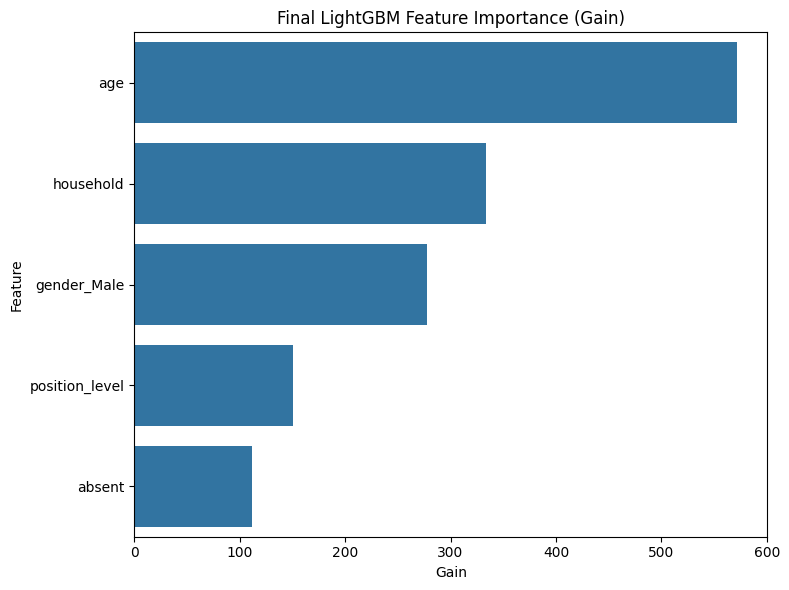

In [32]:
# Variable Importance for Final Model
importance_final = final_model.feature_importances_
feature_names = X_train.columns

importance_final_df = pd.DataFrame({'Feature': feature_names, 'Gain': importance_final})
importance_final_df = importance_final_df.sort_values(by='Gain', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Gain', y='Feature', data=importance_final_df, color='#1f77b4')
plt.title("Final LightGBM Feature Importance (Gain)")
plt.xlabel("Gain")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

## Summary and Conclusion

This notebook provides a comprehensive overview and practical implementation of Light Gradient Boosting Machine (LightGBM) in Python. It begins by explaining the core concepts, key features, advantages, and limitations of LightGBM, including its histogram-based learning, leaf-wise tree growth, GOSS, and EFB techniques. A simple implementation of LightGBM from scratch is also presented to illustrate its fundamental workings.

The notebook then demonstrates the application of LightGBM to both regression and classification tasks using real-world datasets: the California Housing dataset for regression and a health insurance dataset for classification. For each task, the process includes data preparation, training an initial LightGBM model, evaluating its performance, and importantly, performing hyperparameter tuning using GridSearchCV with cross-validation to find the optimal parameters. The final models are then trained with the best parameters and evaluated again to show the improvement in performance. Feature importance is also visualized for both the initial and final models to understand the contribution of different features.

In conclusion, LightGBM is a powerful and efficient gradient boosting framework that excels in handling large datasets. While it offers significant speed and memory advantages over traditional GBM and even XGBoost, particularly its leaf-wise growth can lead to overfitting if not properly regularized. The practical examples in this notebook highlight the importance of hyperparameter tuning to achieve optimal performance and demonstrate how LightGBM can be effectively applied to solve both regression and classification problems.

## References

1.  **Kuhn, M., & Johnson, K. (2019). *Feature Engineering and Selection*. CRC Press.**
    -   Covers gradient boosting and LightGBM applications in R.
    -   [Amazon](https://www.amazon.com/Feature-Engineering-Selection-Practical-Predictive/dp/1138079227)
2.  **Hastie, T., et al. (2009). *The Elements of Statistical Learning* (2nd ed.). Springer.**
    -   Explains boosting theory behind LightGBM.
    -   [Free PDF](https://web.stanford.edu/~hastie/ElemStatLearn/)
3.  **Boehmke, B., & Greenwell, B. (2019). *Hands-On Machine Learning with R*. CRC Press.**
    -   Practical LightGBM tutorials in R.
    -   [CRC Press](https://www.crcpress.com/Hands-On-Machine-Learning-with-R/Boehmke-Greenwell/p/book/9781138495685)


4. [LightGBM Documentation](https://lightgbm.readthedocs.io/)

1.  **Ke, G., et al. (2017). LightGBM: A Highly Efficient Gradient Boosting Decision Tree. *NeurIPS*.**
    -   Introduces LightGBM’s algorithms (GOSS, EFB).
    -   [arXiv](https://arxiv.org/abs/1711.04289)
2.  **Friedman, J. H. (2001). Greedy Function Approximation: A Gradient Boosting Machine. *Annals of Statistics*.**
    -   Foundational gradient boosting theory.
    -   [Stanford](https://statweb.stanford.edu/~jhf/ftp/trebst.pdf)
3.  **Chen, T., & Guestrin, C. (2016). XGBoost: A Scalable Tree Boosting System. *KDD*.**
    -   Context for LightGBM’s improvements over XGBoost.
    -   [arXiv](https://arxiv.org/abs/1603.02754)



